# Rede aleatória

In [ ]:
# Etapa 1: Definição e inicialização de variáveis

N = 100 # Número de vértices
M = 1*N # x1, pois a rede terá a mesma quantidade de vértices e arestas. Poderia ser 2, 3, etc...
lista_k = [0]*N # Lista para armazenar os graus de cada vértice
lista_adj = [0]*N # Lista para armazenar os vizinhos de cada vértice

ite_n = 0 # Iteração em N

while ite_n < N:
  lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
  ite_n += 1

#print(lista_adj)

In [ ]:
# Etapa 2: Construção da rede

import random 

ite_m = 0

while ite_m < M:
  v1 = int(N*random.random()) # Gera um valor inteiro aleatório entre 0 e 999 (1000 números)
  v2 = int(N*random.random())

  while v2 in lista_adj[v1]: # Este laço evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si
    v2 = int(N*random.random())
  
  lista_adj[v1].append(v2) # Adiciona na posição [v1] (que é uma lista por sí só dentro da lista_adj[]) o valor v2
  lista_adj[v2].append(v1) # Mesmo processo acima, porém, ao contrário
  
  # Aumenta os gráus dos vértices em questão nas posições v1 e v2
  lista_k[v1] = lista_k[v1] + 1
  lista_k[v2] = lista_k[v2] + 1

  ite_m += 1

In [ ]:
# Etapa 3: Extração de dados da rede

max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento

ite_n = 0

while ite_n < N:
  histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
  ite_n += 1

# Rede de Barabási e Albert

**Regras básicas:** crescimento da rede e ligação preferencial.

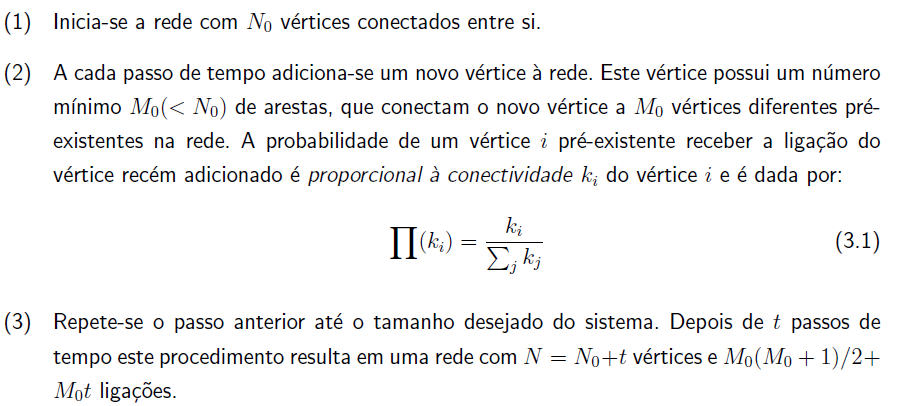
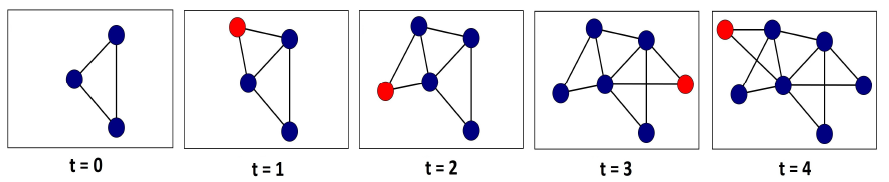

In [55]:
# (i) Definição da condição inicial

N = 250 # Tamanho do sistema
M_o = 3 # Quantidade de vizinhos que cada novo vértice adicionado à rede terá, ou número de ligações que este novo vértice deve fazer ao ser adicionado a rede

import random

lista_k = [0]*N 
lista_adj = [0]*N

lista_todas_prob = [0]*N
lista_soma_prob = [0]*N

# contador
ite_n = 0

# Cria uma lista com o tamanho desejado do sistema
while ite_n < N:
  lista_adj[ite_n] = [ite_n] # Em cada posição da lista_adj[] será criada uma outra lista com um único item, de acordo com a numeração ite_n
  ite_n += 1                 # ite_n ([[0],[1],[2],...[N-1]])

# Contadores
ite_m = 0
ite_m2 = 0 

# Gera a condição inicial (T=0) da figura na descrição
print('CONDICAO INICIAL')

while ite_m < M_o:
  ite_m2 = ite_m + 1
  
  print("\n---------------")
  print("ite_m: ", ite_m)
  print("ite_m2: ",ite_m2)

  while ite_m2 < M_o + 1:
    # Atualiza as ligações entre dois vértices
    lista_adj[ite_m].append(ite_m2)
    lista_adj[ite_m2].append(ite_m) 

    # Atualiza os graus dos vértices que foram ligados
    lista_k[ite_m] = lista_k[ite_m] + 1
    lista_k[ite_m2] = lista_k[ite_m2] + 1

    print("---------------")
    print("Ciclo: ", ite_m2)
    print('\nlista_adj: ',lista_adj)
    print('lista_k: ',lista_k)

    ite_m2 += 1
  ite_m += 1

CONDICAO INICIAL

---------------
ite_m:  0
ite_m2:  1
---------------
Ciclo:  1

lista_adj:  [[0, 1], [1, 0], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124], [125], [126], [127], [128], [129], [130], [131], [132], [133], [134], [135], [136], [137], [138], [139], [140], [141], [142], [143], [

In [56]:
# Cálcula a probabilidade de conexão associada a cada vértice que já está na rede
def calcula_prob(ite_n): # O parâmetro recebido 'ite_n' diz a função quandos vértices já fazem parte da rede a cada iterada 
  #print('\n################################################################################################################\n')
  #print('CALCULOS DAS CONECTIVIDADES ATUALIZADAS\n')
  #print('Vertice novo (v1): ', ite_n)
  
  soma_prob = 0
  soma_lista_k = float(sum(lista_k)) # Denominador da equação 3.1

  ite_p = 0 # contador

  while ite_p < ite_n: # O percorrimento desse while aumenta a cada iterada a medida que o variável associada ao tamanho da rede atual (ite_n) aumenta
    #print('------------------------')
    #print('ite_p: ', ite_p)
    #print('soma_lista_k: ', soma_lista_k)

    prob = float(lista_k[ite_p])/soma_lista_k # Equação 3.1 (conectividade Ki). É atualizada a cada iterada 'ite_p' para cada vértice presente na rede atualmente
    lista_todas_prob[ite_p] = prob            # Armazena a probabilidade de conexão (conectividade Ki) do vértice na posição 'ite_p'
    soma_prob = soma_prob + prob
    lista_soma_prob[ite_p] = soma_prob # Armazena a soma das probabilidades atual para cada vértice na posição 'ite_p'. A soma acumulada aumenta com ite_p, 
                                       # de maneira que menores índices de probabilidade acumulada (posições iniciais em 'lista_todas_prob[]) favoreçam os vértices iniciais
    ite_p += 1                         # a receberem ligação primeiro (ligação pref) a medida que a 'lista_soma_prob' é percorrida na função 'encontra_v2'
                                       
    #print('\nConectividade (Ki): ', prob)
    #print('soma_prob: ', soma_prob)
    #print('\nlista_todas_prob: ', lista_todas_prob)
    #print('lista_soma_prob: ', lista_soma_prob)

In [57]:
# Função que procura com quem o vértice que está entrando na rede irá se conectar. 
# É esta função que caracteriza a regra da ligação preferencial

def encontra_v2(ite_n, prob_v2):
  #print('\n-------------------------------------------------------------------------------------\n')
  #print('SELECAO DOS VERTICES\n')
  ite_n2 = 0 # Contador para indexar a posição na lista 'lista_soma_prob'

  while ite_n2 < ite_n: # Percorre no máximo o tamanho da lista de acordo com a quantidade atual de elementos (ite_n)
    if lista_soma_prob[ite_n2] >= prob_v2: 
      #print('Indice do vertice selecionado: ', ite_n2)
      #print('prob_v2: ',prob_v2)
      return ite_n2                       # retorna o índice do vértice (ite_n2) na lista_soma_prob selecionado pra receber a ligação
    ite_n2 += 1

In [58]:
# (ii) iteração das regras de conexão

# Passo (2) - laço principal

ite_n = M_o + 1

while ite_n < N:
  v1 = ite_n # Vértice que está entrando na rede
  calcula_prob(ite_n) # Calcula a probabilidade associada a cada vértice que está na rede de receber ligações do vértice que entrou a cada iterada e armazena esses valores
  
  ite_m = 0

  while ite_m < M_o: # Bloco executado sempre M_o vezes 
    prob_v2 = random.random() # Número aleatório entre 0-1 (para comparação com v2 na função 'encontra_v2'
    v2 = encontra_v2(ite_n, prob_v2) # Vértice da rede escolhido através da execução da função 'encontra_v2' para receber ligação do vértice que está entrando (v1)
    #print('\nVertice escolhido: ', v2)

    while v2 in lista_adj[v1]:         # Evita autoarestas e limitam os vértices a terem no máximo uma ligação entre si, verificando 
      prob_v2 = random.random()        # se v2 (vértice selecionado) já está contido na posição v1 (vértice que está entrando) da lista_adj
      v2 = encontra_v2(ite_n, prob_v2)

    lista_adj[v1].append(v2) # Adiciona na posição [v1] (que é uma lista por sí só dentro da lista_adj[]) o valor v2
    lista_adj[v2].append(v1) # Mesmo processo acima, porém, ao contrário
  
    # Atualiza os gráus dos vértices em questão nas posições v1 e v2
    lista_k[v1] = lista_k[v1] + 1
    lista_k[v2] = lista_k[v2] + 1

    #print('\nlista_adj: ',lista_adj)
    #print('lista_k: ',lista_k)

    ite_m += 1
  ite_n += 1

In [59]:
# Passo (3) - Extração de dados da rede

max_k = max(lista_k) # Armazena na variável o maior valor da lista_k[]
histograma_k = [0]*(max_k + 1) # Criar a quantidade de posições na lista histograma_k necessárias para o armazenamento

ite_n = 0

while ite_n < N:
  histograma_k[lista_k[ite_n]] = histograma_k[lista_k[ite_n]] + 1 # Armazena em cada posição da lista histograma_k[] a quantidade de vértices que possuem tal grau. 
                                                                  # Cada posição na lista histograma_k[] significa o valor do grau. [0] grau zero; [1] grau 1...
                                                                  # Exemplo: [0,5,2,7,10,8] a posição [3] (grau 3) possui 7 vértices com grau 3
  ite_n += 1

print(histograma_k)

[0, 0, 0, 102, 42, 31, 15, 13, 12, 8, 3, 6, 2, 5, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


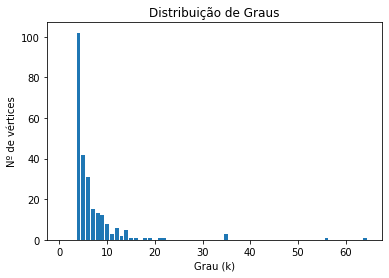

Lista k:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Lista histograma_k:  [0, 0, 0, 102, 42, 31, 15, 13, 12, 8, 3, 6, 2, 5, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [60]:
# Plot do histograma

import math
import numpy as np
import matplotlib.pyplot as plt

k = [] # Lista que armazenara os valores dos graus
i = 0

# Este 'for' gera uma lista de graus 'k' em função do tamanho da lista 'histograma_k'
for i in range(len(histograma_k)): 
  k.append(i + 1) # +1 para sincronizar a lista 'k' com 'histograma_k'
  i += 1

plt.bar(k, histograma_k)
plt.xlabel('Grau (k)')
plt.ylabel('Nº de vértices')
plt.title('Distribuição de Graus')
plt.show()

print('Lista k: ', k)
print('Lista histograma_k: ', histograma_k)


In [61]:
"""Filtragem da lista 'k' e 'histograma_k'
   Necessária para eliminar elementos nulos na lista histograma_k e remover nesses mesmos índices os elementos da lista 'k'.
   Assim, teremos as duas listas apenas com os graus e a quantidades de vértices com tais graus existentes, eliminando valores
   nulos, de maneira a evitar erros na regressão linear."""

# Convertendo 'k' e 'histograma_k' em um array NumPy. X = k ; Y = histograma_k
X = np.array(k)
Y = np.array(histograma_k)

# Mapeia quais índices em Y possuem valor 0  armazena em 'indexes'. 'indexes' é uma lista que armazena as posições que possuem o valor 0
indexes = np.where(Y == 0)

# Remove das listas X e Y os índices que possuem elementos 0 da lista Y. Argumentos da função 'delete(arr, obj, axis)'
X = np.delete(X, indexes)
Y = np.delete(Y, indexes)

print('Lista k[]: ', X)
print('Lista histograma_k[]: ', Y)

Lista k[]:  [ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 21 22 35 56 64]
Lista histograma_k[]:  [102  42  31  15  13  12   8   3   6   2   5   1   1   1   1   1   1   3
   1   1]


## Regressão linear - Fundamentos

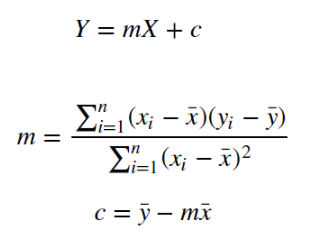

In [62]:
# Converte os valores para log
X1 = np.log(X)
Y1 = np.log(Y)

# 10 primeiros valores
X = X1[0:10]
Y = Y1[0:10]

print('Lista k[]: ', X)
print('Lista histograma_k[]: ', Y)

Lista k[]:  [1.38629436 1.60943791 1.79175947 1.94591015 2.07944154 2.19722458
 2.30258509 2.39789527 2.48490665 2.56494936]
Lista histograma_k[]:  [4.62497281 3.73766962 3.4339872  2.7080502  2.56494936 2.48490665
 2.07944154 1.09861229 1.79175947 0.69314718]


Coeficiente angular = -2.97
Coeficiente linear = 8.68
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
[4.62497281 3.73766962 3.4339872  2.7080502  2.56494936 2.48490665
 2.07944154 1.09861229 1.79175947 0.69314718]


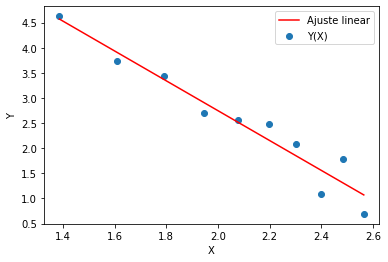

In [63]:
# Cálculo da regressão linear 

media_X = np.mean(X)
media_Y = np.mean(Y)

erro_X = X-media_X
erro_Y = Y-media_Y

soma_erro_XY = np.sum(erro_X*erro_Y)
erro_X_quadratico = (X-media_X)**2.0
soma_erro_X_quadratico = np.sum(erro_X_quadratico)

m = soma_erro_XY / soma_erro_X_quadratico 
print("Coeficiente angular = {:0.2f}".format(m))

c = media_Y - m*media_X
print("Coeficiente linear = {:0.2f}".format(c))

reta = m*X+c

plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

print(k)
print(Y)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 0.24
RMSE = 0.29
